# Barplot (skoda_used_car_EDA)

<h4> Import required libraries and packages </h4>

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h4> Reading the csv file </h4>

In [187]:
df = pd.read_csv("skoda.csv")

display(df)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,54.3,1.4
1,Citigo,2018,8200,Manual,1264,Petrol,67.3,1.0
2,Octavia,2019,15650,Automatic,6825,Diesel,67.3,2.0
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,51.4,2.0
4,Superb,2019,18350,Manual,10912,Petrol,40.9,1.5
...,...,...,...,...,...,...,...,...
6262,Yeti,2014,11440,Semi-Auto,14569,Petrol,44.8,1.2
6263,Octavia,2014,10990,Semi-Auto,49999,Petrol,56.5,1.4
6264,Fabia,2017,9500,Semi-Auto,17131,Petrol,61.4,1.0
6265,Citigo,2016,5999,Manual,21747,Petrol,62.8,1.0


In [188]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6267 entries, 0 to 6266
Data columns (total 8 columns):
model           6267 non-null object
year            6267 non-null int64
price           6267 non-null int64
transmission    6267 non-null object
mileage         6267 non-null int64
fuelType        6267 non-null object
mpg             6267 non-null float64
engineSize      6267 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 391.8+ KB


None

<h4> Create a function to count the unique values present in a column</h4>

In [236]:
def unique_val_count(data, column):
    df_count = df[column].value_counts()
    df_count = pd.DataFrame(df_count)
    df_count = df_count.reset_index()
    #df_count = df_count.sort_values(by='index', ascending = False)
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    
    return df_count

In [237]:
model_count = unique_val_count(df, 'model')
year_count = unique_val_count(df, 'year')
price_count = unique_val_count(df, 'price')
transmission_count = unique_val_count(df, 'transmission')
mileage_count = unique_val_count(df, 'mileage')
fuelType_count = unique_val_count(df, 'fuelType')
mpg_count = unique_val_count(df, 'mpg')
engineSize_count = unique_val_count(df, 'engineSize')

In [238]:
# sort the year_count DataFrame based on 'year'
year_count = year_count.sort_values(by='year')
# year_count

<h4> Create a function named barplot</h4>

In [239]:
def barplot(data, column_x, color, rotation, yticks):
    
    # create a barplot using seaborn
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.9)
    
    # write a title for your plot
    plt.title("Number of cars present for each " + column_x, fontsize= 22)
    
    # write proper lebel for the x and y axis
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    
    # rotate the xticks if necessary
    plt.xticks(rotation=rotation)
    
    # provide a range for the yticks
    plt.yticks(yticks)
    


<h4>Creating final Barplot where each subplot denotes a column</h4>

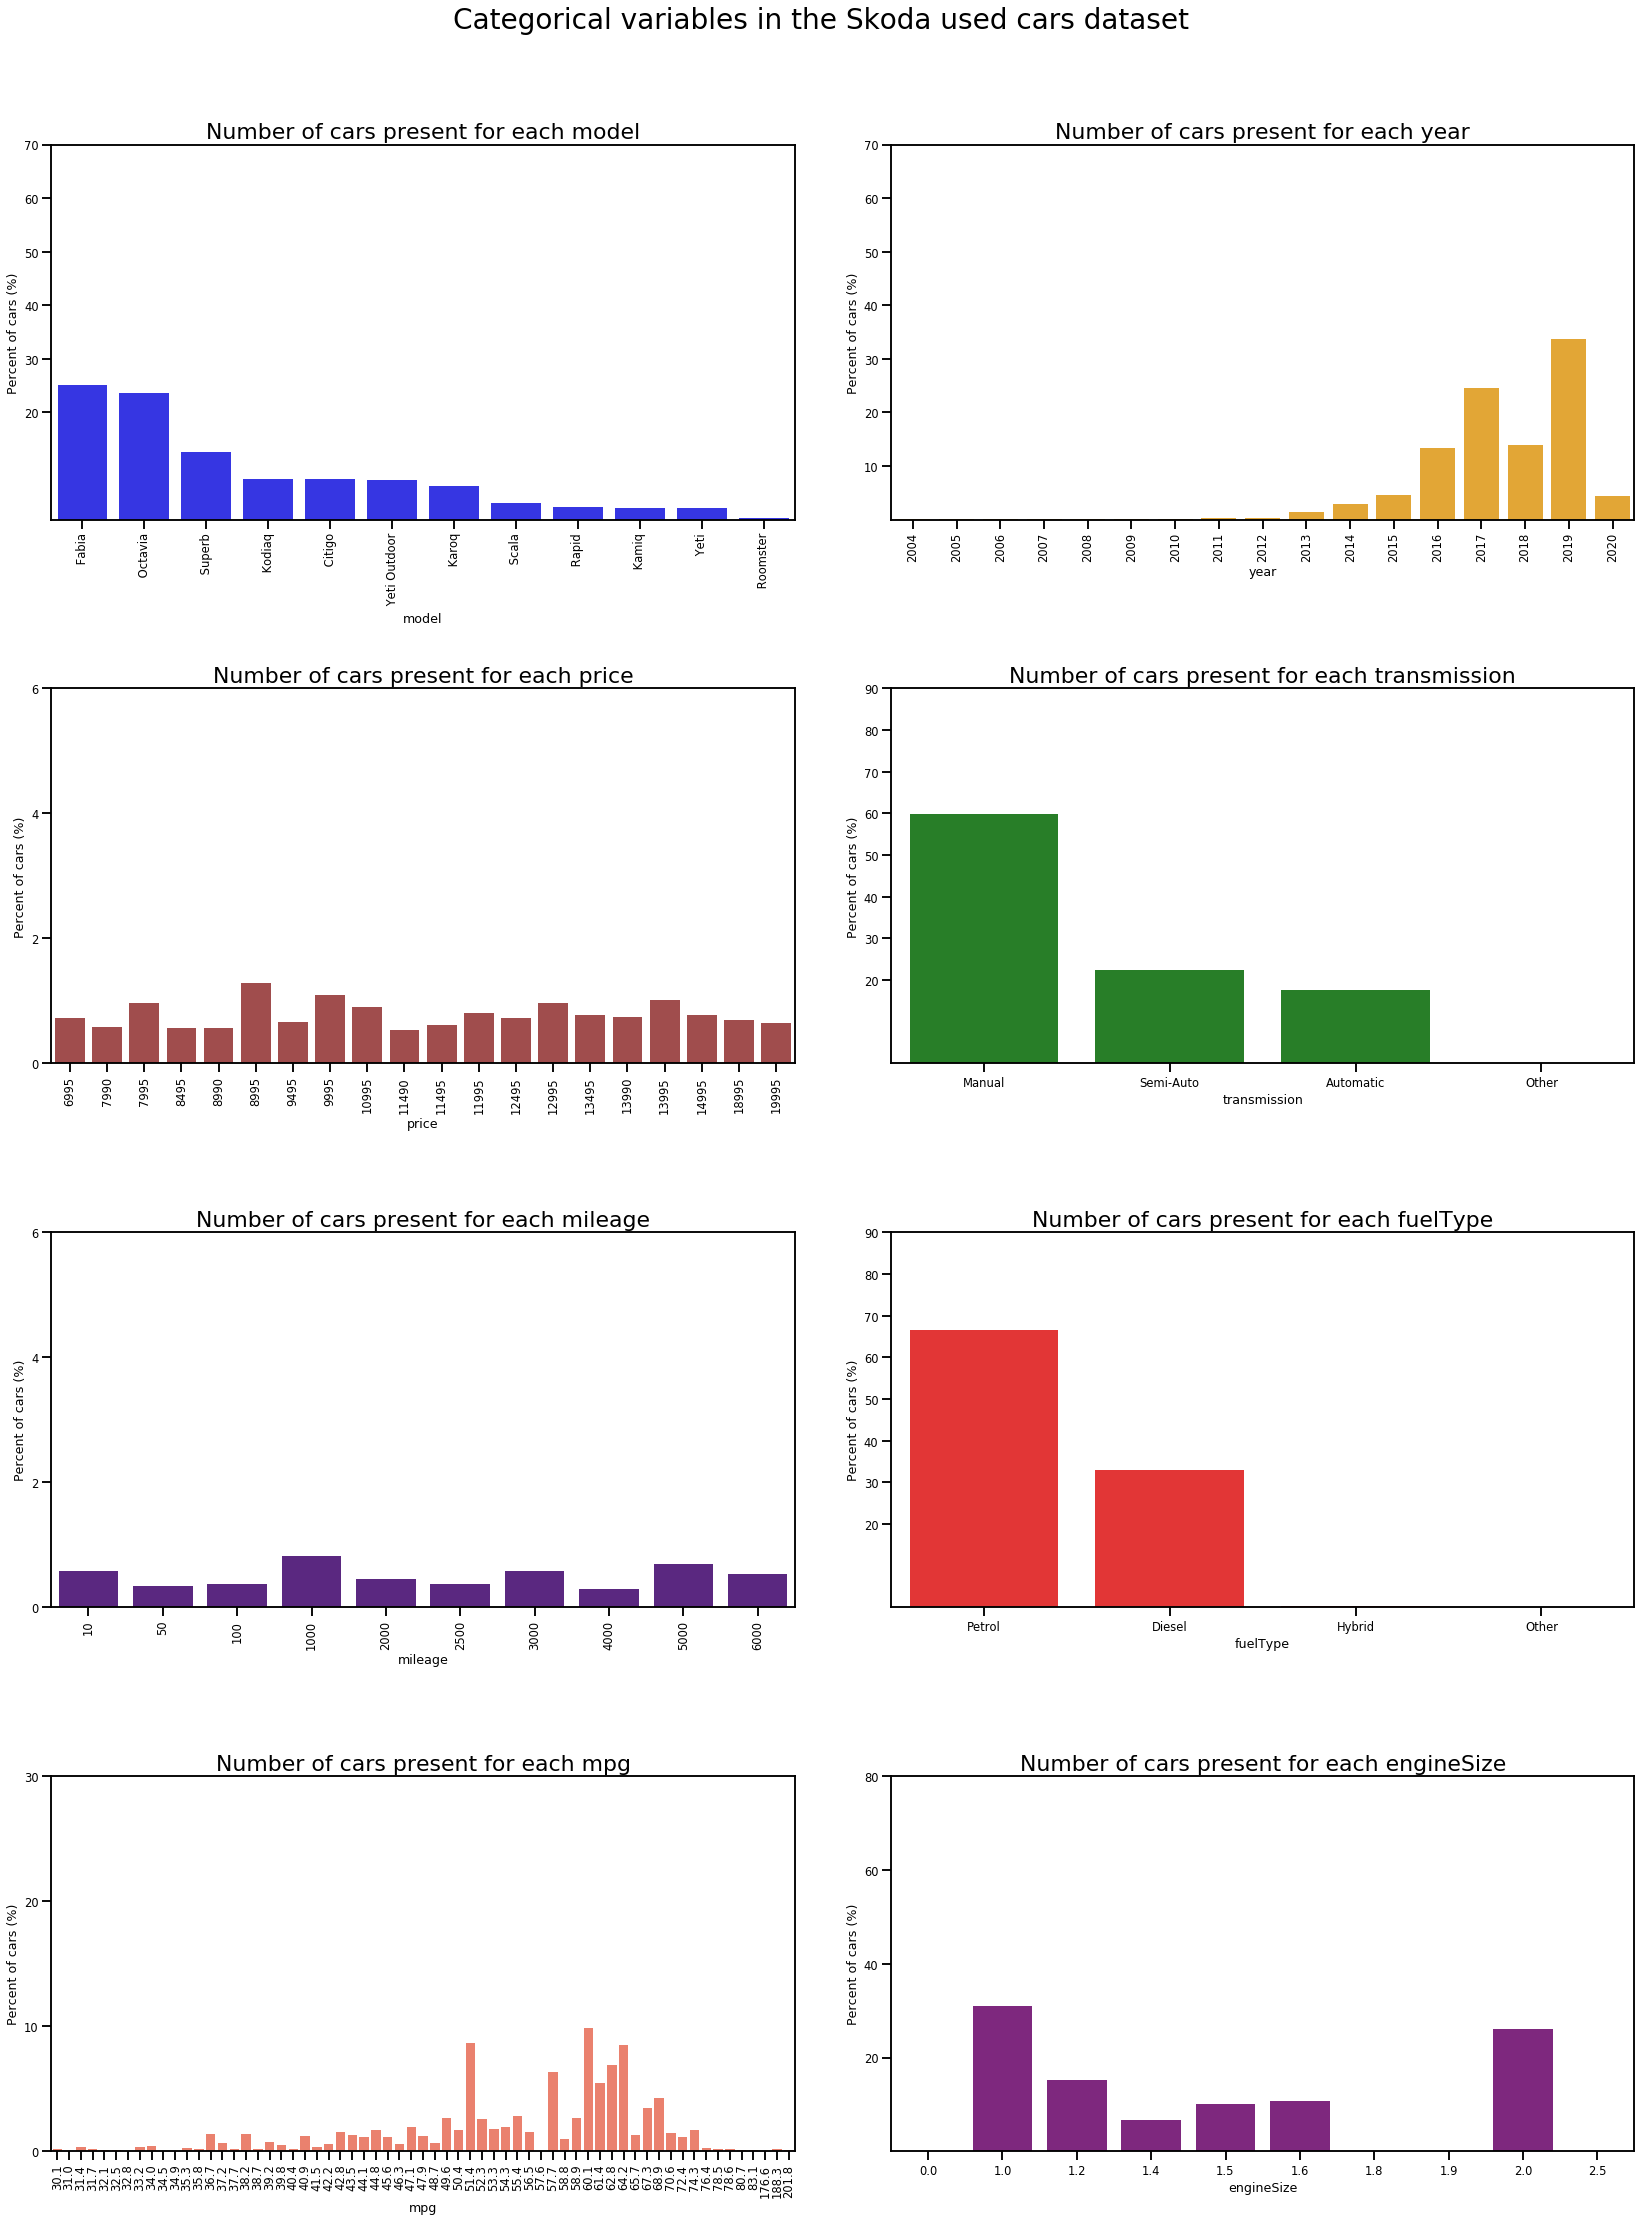

In [243]:
sns.set_context("talk", font_scale= 0.7)
plt.figure(figsize=(24,32))


# row 1, column 1
plt.subplot(4,2,1)
barplot(model_count, 'model', 'blue', 90, np.arange(20,71,10))

# row 1, column 2
plt.subplot(4,2,2)
barplot(year_count, 'year', 'orange', 90, np.arange(10,71,10))

# row 2, column 1
plt.subplot(4,2,3)
barplot(price_count.head(20), 'price', 'brown', 90, np.arange(0,7,2))

# row 2, column 2
plt.subplot(4,2,4)
barplot(transmission_count, 'transmission', 'green', 0, np.arange(20,91,10))

# row 3, column 1
plt.subplot(4,2,5)
barplot(mileage_count.head(10), 'mileage', 'indigo', 90, np.arange(0,8,2))

# row 3, column 2
plt.subplot(4,2,6)
barplot(fuelType_count, 'fuelType', 'red', 0, np.arange(20,91,10))

# row 4, column 1
plt.subplot(4,2,7)
barplot(mpg_count, 'mpg', 'tomato', 90, np.arange(0,31,10))

# row 4, column 2
plt.subplot(4,2,8)
barplot(engineSize_count, 'engineSize', 'purple', 0, np.arange(20,91,20))


# keep the individual plots separate from each other
plt.tight_layout(pad=4)


# write the title for all the plots
plt.suptitle('Categorical variables in the Skoda used cars dataset', fontsize=28, ha="center")
plt.subplots_adjust(top=0.92)
# display the plots
plt.show()